# Stable Diffusion Demo 

This notebook demonstrates the Stable Diffusion pipeline with visualization of latent representations at each denoising step.

In [1]:
import model_loader
import pipeline
from PIL import Image
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"

ALLOW_CUDA = True
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

/home/shora/Research/stable-diffusion/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda


In [2]:
# Load models and tokenizer
tokenizer = CLIPTokenizer("../data/vocab.json", merges_file="../data/merges.txt")
model_file = "../data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)
print("Models loaded successfully!")

Models loaded successfully!


In [ ]:
# Configuration
prompt = "A dog wearing a red scarf, sitting in a dreamy flower field at golden hour, highly detailed, realistic style"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

# Image to image (optional)
input_image = None
# Uncomment to enable image to image
# image_path = "../images/dog.jpg"
# input_image = Image.open(image_path)
strength = 0.9

# Sampler settings
sampler = "euler"
num_inference_steps = 30  
seed = 42

print(f"Prompt: {prompt}")
print(f"Steps: {num_inference_steps}")
print(f"Seed: {seed}")
print(f"CFG Scale: {cfg_scale}")

Prompt: A dog wearing a red scarf, sitting in a dreamy flower field at golden hour, highly detailed, realistic style
Steps: 30
Seed: 42
CFG Scale: 8


In [4]:
# Generate image with latent visualization
output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

100%|██████████| 30/30 [00:06<00:00,  4.68it/s]


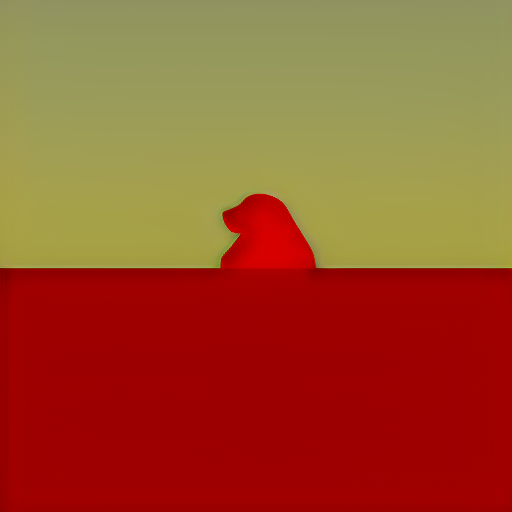

In [5]:
Image.fromarray(output_image)

## Understanding the Latent Visualization

### What are Latents?
- **Latents** are the compressed representation of images in a lower-dimensional space (64x64x4 instead of 512x512x3)
- The **4 channels** represent different aspects of the image content
- During diffusion, noise is gradually removed from these latents to form the final image

### Denoising Process:
1. **Step 0**: Pure random noise in latent space
2. **Early Steps**: Rough shapes and structures begin to emerge
3. **Middle Steps**: More defined features and composition
4. **Late Steps**: Fine details and refinement
5. **Final Step**: Clean latents that decode to the final image

### Channel Interpretation:
- Each of the 4 latent channels captures different aspects of the image
- The exact meaning of each channel is learned during training
- Generally, they represent different frequency components and feature maps

### Visualization Benefits:
- **Debug generation**: See where the process might be going wrong
- **Understand timing**: Observe when key features appear
- **Compare prompts**: See how different prompts affect the denoising trajectory
- **Optimize parameters**: Adjust CFG scale, steps, etc. based on intermediate results